In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines1
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", (X_train.shape))
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

In [ ]:
X1=np.array([])
X1=(y_train==7)
X1.reshape(60000,1)
X_train=X_train[X1]  
X_train.shape

(6265, 784)

**PCA**

In [ ]:
import numpy as np
from scipy.linalg import svd
 
def PCA(X,variance):
    X_meaned = X - np.mean(X , axis = 0)
    mean=np.mean(X , axis = 0)
     
    cov_mat = np.cov(X_meaned , rowvar = False)
    print (cov_mat.shape)
     
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    l=len(eigen_values)
    sum_variance=[0 for i in range(l)]
    for i in range(l):
      sum_variance[i]=sum_variance[i-1]+sorted_eigenvalue[i]
    sum_variance=sum_variance/sum_variance[l-1]
    for i in range(1, l+1):
      if (sum_variance[i]>=variance):
        b=i
        break 
    plt.plot(range(1,l+1),sum_variance*100)
    U, s, VT = svd(cov_mat)
    U=U[:,:b]
    B = U.T.dot(X_meaned.T).T
    print (B.shape,b)
    return B,mean,U

(6265, 6265)


ValueError: ignored

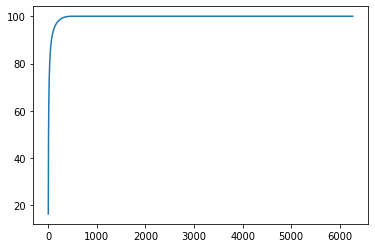

In [ ]:
X_reduced,mean,U=PCA(X_train,0.95)
X_reduced.shape

In [ ]:
def PCA_rev(Z_reduced,mean,U):
  X=Z_reduced.dot(U.T)
  return X



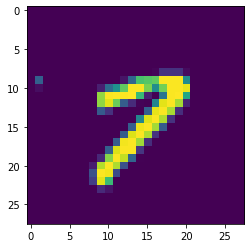

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[1].reshape([28,28]), interpolation='nearest')
plt.show()

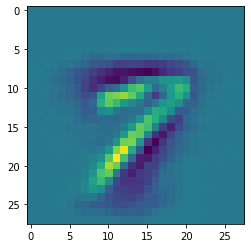

In [ ]:
from matplotlib import pyplot as plt
Y_reduced=PCA_rev(X_reduced,mean,U)
plt.imshow(Y_reduced[1].reshape([28,28]), interpolation='nearest')
plt.show()